**음악의 표현 방법**

---
**오디오 표현**
- 음파
- 피치와 주파수
- 고조파
- 다이내믹(dynamics), 강도(intensity), 라우드니스(loudness)
- 음색(timbre)

In [4]:
import IPython.display as ipd
from IPython.display import Image
from IPython.display import Audio
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from collections import OrderedDict
import librosa
import librosa.display

from utils.plot_tools import plot_signal, plot_matrix
# from util import *

- 음악가들은 악보를 연주할 때 소리를 기압 진동을 통해 공기로 보낸다. 간단히 말해 소리는 공기 진동이다. 소리는 종파(longitundinal waves)를 통해 진동한다.

- 오디오는 인간이 들을 수 있는 소리의 생산, 전송 또는 수신을 의미한다. 
- 오디오 신호는 진동에 의해 발생하는 기압의 변동을 시간의 함수로 나타내는 소리의 표현이다. 
- 악보나 기호 표현과는 달리, 오디오 표현은 음악의 음향적 실현을 재현하는 데 필요한 모든 것을 인코딩한다. 그러나 온셋, 지속 시간(duration) 및 피치와 같은 참고 매개 변수는 명시적으로 인코딩되지 않는다. 오디오 표현에서 기호 표현으로 변환하는 것을 어려운 작업이다.

# 음파 Waveforms

- 소리는 가수의 성대, 바이올린의 현과 소리판 등의 진동하는 물체에 의해 발생한다. 이러한 진동은 공기 분자의 변위와 진동을 유발하여 지역적인 압축(compression)과 희박화(rarefaction)를 초래한다.
- 교류 압력(alternating pressure)은 공기를 통해 파동으로 청취자 또는 마이크로 전달된다. 그것은 사람에 의해 소리로 인식되거나 마이크에 의해 전기 신호로 변환될 수 있다. 
- 그래픽적으로 특정 위치의 기압 변화는 **pressure-time 그림**으로 나타낼 수 있으며, 이는 **파형**(**waveform**)이라고도 한다. 
- 파형 평균 공기압으로부터 공기압의 편차를 나타낸다.

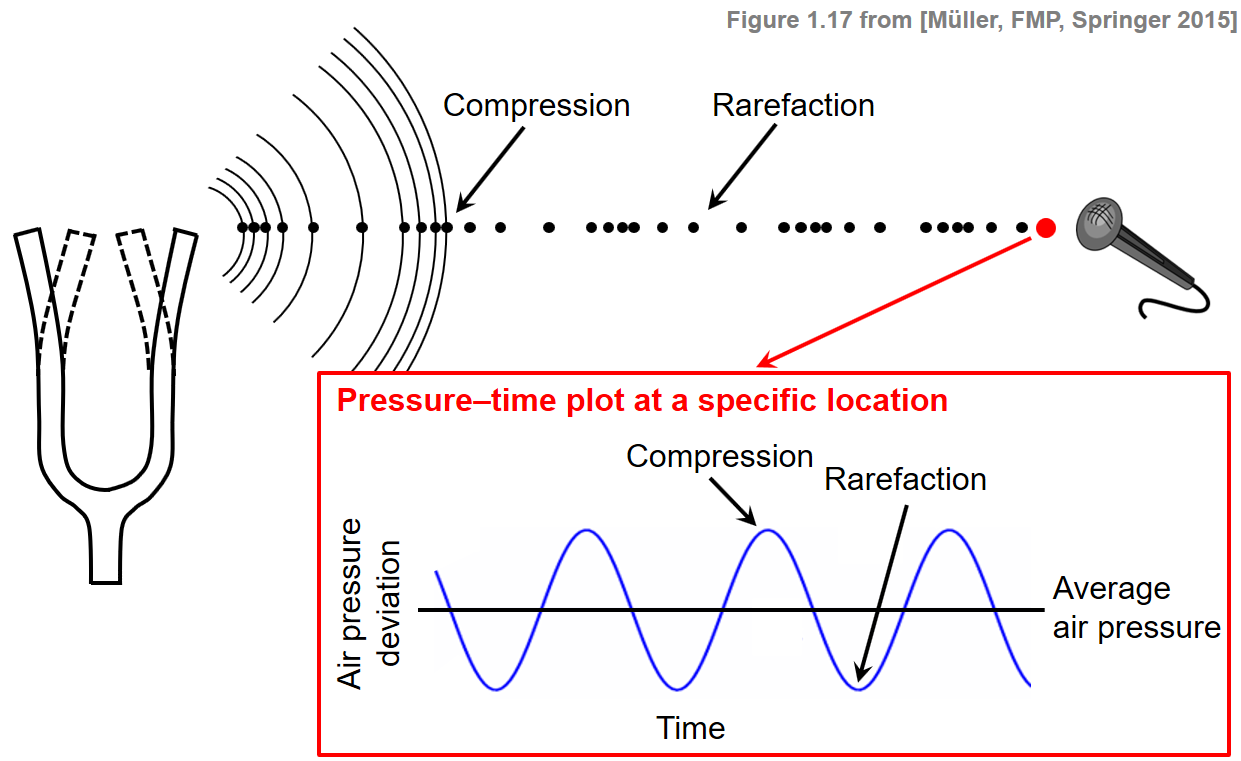

In [5]:
Image("../img/2.music_representation/FMP_C1_F17.png", width=500, height=500)

In [6]:
x, sr = librosa.load('../audio/c_strum.wav')
print("샘플링 레이트: ",sr)
ipd.Audio(x, rate=sr)

샘플링 레이트:  22050


- 위 오디오를 파형으로 보이면 다음과 같다.

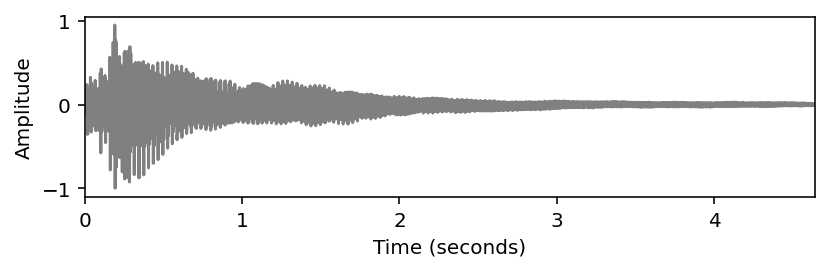

In [96]:
plot_signal(x,sr,ylabel='Amplitude')
plt.show()

- 공기압이 높은 지점과 낮은 지점이 번갈아가며 규칙적으로 반복되는 경우 결과 파형을 주기적(periodic)이라고 한다. 
- 이 경우 파동의 주기는 주기를 완료하는 데 필요한 시간으로 정의된다. 
- 헤르츠(Hz) 단위로 측정된 주파수는 주기의 역수이다. 
- 다음 그림은 가장 단순한 유형의 주기 파형인 사인파(sinusoid)를 보여준다.
    - 이 예에서 파형의 주기는 25초이므로 주파수는 4Hz이다. 
    - 주기적 파형의 가장 단순한 유형은 사인파이며, 주파수(frequency), 진폭(amplitude)(평균에서 사인파의 피크 편차), 위상(phase)(주기에서 사인파가 0인 위치를 결정함)에 의해 완전히 지정된다.

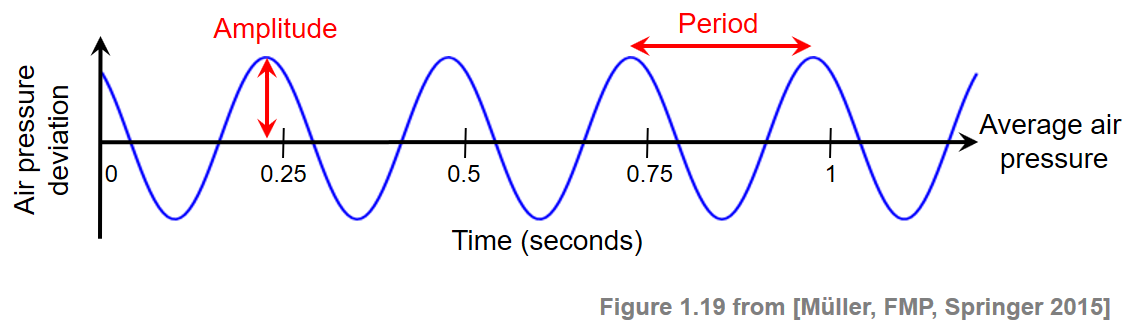

In [97]:
Image("../img/2.music_representation/FMP_C1_F19.png", width=600, height=600)

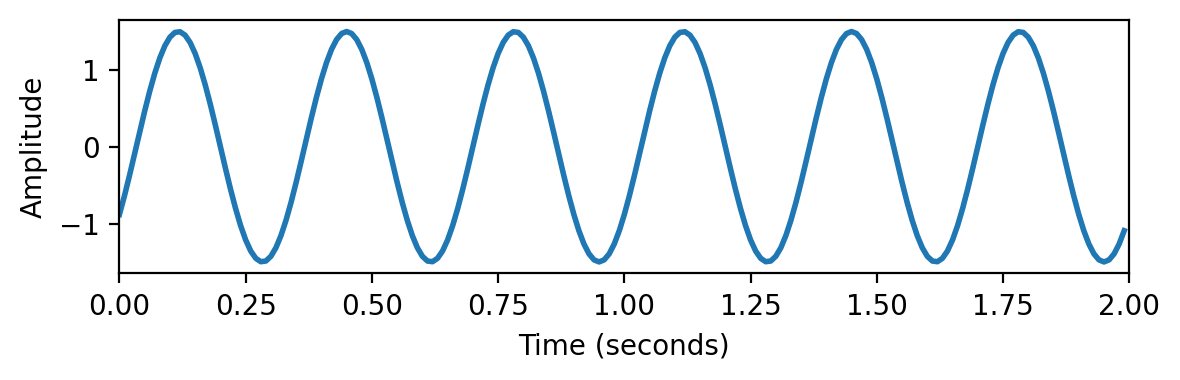

In [98]:
Fs = 100
duration = 2
amplitude = 1.5
phase = 0.1
frequency = 3

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

plt.figure(figsize=(6, 2))
plt.plot(t, x,  linewidth=2.0)
plt.xlim([0, duration])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

- 디지털 컴퓨터는 이 데이터를 이산(discrete) 시간으로 밖에 포착하지 못한다.
- 컴퓨터가 잡는 오디오 데이터의 rate를 샘플링 주파수, 샘플링 레이트(sampling frequency, sampling rate)라고 한다.
- 예를 들어 샘플링 레이트가 44100 Hz이면 CD 레코딩의 샘플링 레이트이다. https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Audio_sampling

---
# 주파수와 피치 Frequency and Pitch

- 주파수 설명 참고 (한글): http://www.ktword.co.kr/test/view/view.php?m_temp1=4148

## **들을 수 있는 주파수 범위**

- 정현파(sinusoidal wave)의 주파수가 높을수록 더 높은 소리를 낸다. 
- 인간의 가청 주파수 범위는 약 20Hz와 20000Hz(20 kHz) 사이이다. 다른 동물들은 다른 청력 범위를 가지고 있다. 예를 들어, 개의 청력 범위의 상단은 약 45kHz이고 고양이의 청력은 64kHz인 반면, 박쥐는 심지어 100kHz 이상의 주파수를 감지할 수 있다. 사람의 청각 능력을 뛰어넘는 초음파를 내는 개 호루라기를 이용해 주변 사람들을 방해하지 않고 동물을 훈련시키고 명령할 수 있는 이유이다.

- 다음 실험에서 주파수가 초당 2배(1옥타브) 증가하는 처프(chirp) 신호를 생성한다.

In [7]:
def generate_chirp_exp_octave(freq_start=440, dur=8, Fs=44100, amp=1):
    """Generate one octave of a chirp with exponential frequency increase
    Args:
        freq_start (float): Start frequency of chirp (Default value = 440)
        dur (float): Duration (in seconds) (Default value = 8)
        Fs (scalar): Sampling rate (Default value = 44100)
        amp (float): Amplitude of generated signal (Default value = 1)
    Returns:
        x (np.ndarray): Chirp signal
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    x = np.sin(2 * np.pi * freq_start * np.power(2, t / dur) / np.log(2) * dur)
    x = amp * x / np.max(x)
    return x, t

In [8]:
# 20Hz부터 시작하여 주파수는 총 10초 동안 20480Hz까지 상승한다.
Fs = 44100
dur = 1
freq_start = 20 * 2**np.arange(10)
for f in freq_start:
    if f==freq_start[0]:
        chirp, t = generate_chirp_exp_octave(freq_start=f, dur=dur, Fs=Fs, amp=.25)
    else:
        chirp_oct, t = generate_chirp_exp_octave(freq_start=f, dur=dur, Fs=Fs, amp=.25)
        chirp = np.concatenate((chirp, chirp_oct))

ipd.display(ipd.Audio(chirp, rate=Fs))

In [9]:
# 640Hz부터 시작하여 주파수는 총 10초 동안 20Hz까지 하락한다.

Fs = 8000
dur = 2
freq_start = 20 * 2**np.arange(5)
for f in freq_start:
    if f==freq_start[0]:
        chirp, t = generate_chirp_exp_octave(freq_start=f, dur=dur, Fs=Fs, amp=1)
    else:
        chirp_oct, t = generate_chirp_exp_octave(freq_start=f, dur=dur, Fs=Fs, amp=1)
        chirp = np.concatenate((chirp,chirp_oct))    
        
chirp = chirp[::-1]    
ipd.display(ipd.Audio(chirp, rate=Fs))

## **피치와 중심 주파수**

- 정현파는 음표의 음향적 실현의 원형으로 간주될 수 있다. 때때로 정현파에서 나오는 소리를 하모닉 사운드(harmonic sound) 또는 순수한 음색(pure tone)이라고 한다. 

- 주파수의 개념은 소리의 피치(=음높이)를 결정하는 것과 밀접한 관련이 있다. 일반적으로 피치는 소리의 주관적인 속성이다. 

- 복잡한 혼합음의 경우, 주파수와의 관계가 특히 모호할 수 있다. 그러나 순수한 음색의 경우 주파수와 피치의 관계가 명확하다. 예를 들어, 440 Hz의 주파수를 갖는 정현파는 피치 A4에 해당한다. 이 특정한 피치는 콘서트 피치(concert pitch)로 알려져 있으며, 이는 연주를 위해 악기가 튜닝되는 기준 피치로 사용된다. 

- 주파수의 약간의 변화가 반드시 지각할 수 있는 변화로 이어지는 것은 아니기 때문에, 일반적으로 주파수의 전체 범위를 단일 피치와 연관시킨다.

- 두 주파수가 2의 거듭제곱에 의해 차이가 나는 경우, 이는 옥타브의 개념과 연관된다.
    - 예를 들어, 피치 A3(220 Hz)와 피치 A4(440 Hz) 사이의 인식 거리는 피치 A4와 피치 A5(880 Hz) 사이의 인식 거리와 동일하다. 
    - 즉, 피치에 대한 인간의 인식은 본질적으로 로그이다. 이 지각 특성은 이미 로그 주파수 축을 기준으로 옥타브를 12개의 반음으로 세분화하는 평균율("equal-tempered scale")을 정의하는 데 사용되었다.

- 더 공식적으로, MIDI 노트 번호를 사용하여, 우리는 다음과 같이 정의된 **중심 주파수**(center frequency) $F_{pitch}(p)$(Hz 단위로 측정)를 각 피치 $p∈[0:127]$
에 연결할 수 있다.
    - $F_{pitch}(p)=2^{(p−69)/12} \cdot 440$
        - MIDI 노트 번호 $p=69$는 기준으로 사용되며 피치 A4(440Hz)에 해당된다. 피치 넘버를 12(옥타브) 증가시키면 2배 증가한다. $F_{pitch} ( p + 12) = 2 \cdot F_{pitch} ( p)$

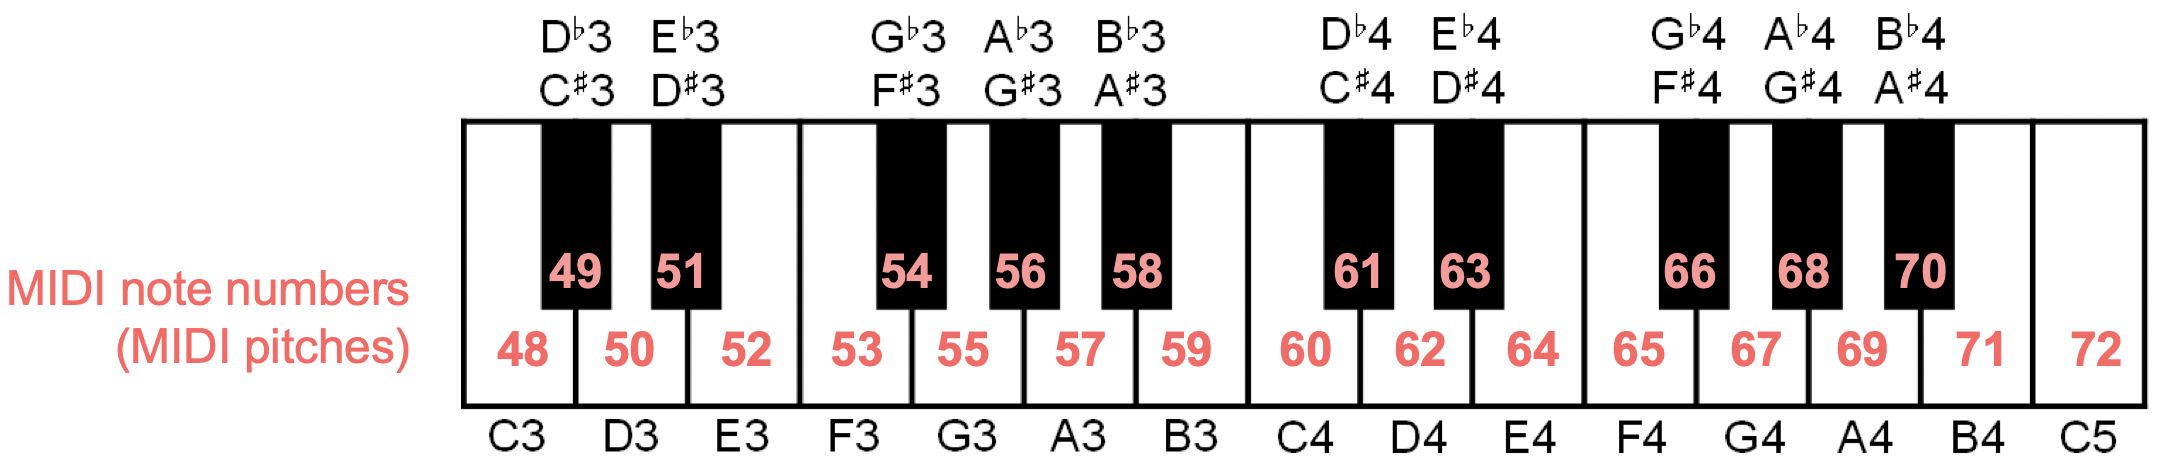

In [10]:
Image("../img/2.music_representation/FMP_C1_MIDI-NoteNumbers.png", width=500, height=500)

In [13]:
def f_pitch(p):
    """Compute center frequency for (single or array of) MIDI note numbers
    Args:
        p (float or np.ndarray): MIDI note numbers
    Returns:
        freq_center (float or np.ndarray): Center frequency
    """
    freq_center = 2 ** ((p - 69) / 12) * 440
    return freq_center

chroma = ['A ', 'A#', 'B ', 'C ', 'C#', 'D ', 'D#', 'E ', 'F ', 'F#', 'G ', 'G#']

for p in range(21, 109):
    print('p = %3d (%2s%1d), freq = %7.2f ' % (p, chroma[(p-69) % 12], (p//12-1), f_pitch(p)))

p =  21 (A 0), freq =   27.50 
p =  22 (A#0), freq =   29.14 
p =  23 (B 0), freq =   30.87 
p =  24 (C 1), freq =   32.70 
p =  25 (C#1), freq =   34.65 
p =  26 (D 1), freq =   36.71 
p =  27 (D#1), freq =   38.89 
p =  28 (E 1), freq =   41.20 
p =  29 (F 1), freq =   43.65 
p =  30 (F#1), freq =   46.25 
p =  31 (G 1), freq =   49.00 
p =  32 (G#1), freq =   51.91 
p =  33 (A 1), freq =   55.00 
p =  34 (A#1), freq =   58.27 
p =  35 (B 1), freq =   61.74 
p =  36 (C 2), freq =   65.41 
p =  37 (C#2), freq =   69.30 
p =  38 (D 2), freq =   73.42 
p =  39 (D#2), freq =   77.78 
p =  40 (E 2), freq =   82.41 
p =  41 (F 2), freq =   87.31 
p =  42 (F#2), freq =   92.50 
p =  43 (G 2), freq =   98.00 
p =  44 (G#2), freq =  103.83 
p =  45 (A 2), freq =  110.00 
p =  46 (A#2), freq =  116.54 
p =  47 (B 2), freq =  123.47 
p =  48 (C 3), freq =  130.81 
p =  49 (C#3), freq =  138.59 
p =  50 (D 3), freq =  146.83 
p =  51 (D#3), freq =  155.56 
p =  52 (E 3), freq =  164.81 
p =  53 

- 이 공식으로부터, 두 개의 연속된 피치 p+1과 p의 주파수 비율은 일정하다.
    - $F_\mathrm{pitch}(p+1)/F_\mathrm{pitch}(p) = 2^{1/12} \approx  1.059463$

- 반음의 개념을 일반화하여 **센트**(**cent**)는 음악 간격에 사용되는 로그 단위를 나타낸다. 정의에 따라 옥타브는 $1200$ 센트로 나뉘며, 각 반음은 $100$센트에 해당한다. 두 주파수(예: $\omega_1$ 및 $\omega_2$) 사이의 센트 차이는 다음과 같다.
    - $\log_2\left(\frac{\omega_1}{\omega_2}\right)\cdot 1200.$

- 1센트의 간격은 너무 작아서 연속된 음 사이를 들을 수 없다. 지각할 수 있는 것의 문턱은 사람마다 다르고 음색과 음악적 맥락과 같은 다른 측면에 따라 달라진다. 경험에 비추어 볼 때, 일반적인 성인들은 음높이의 차이가 작다는 것을 인식할 수 있다.
- 경험적으로 일반 성인은 25달러센트의 작은 음높이 차이를 매우 안정적으로 인식할 수 있으며, 10달러센트의 차이는 훈련된 청취자만이 인식할 수 있다.
- 그림에서와 같이, 우리는 기준으로 사용되는 $440~\mathrm{Hz}$의 정현파와 다양한 차이를 가진 추가 정현파를 생성한다.

In [14]:
def difference_cents(freq_1, freq_2):
    """Difference between two frequency values specified in cents

    Args:
        freq_1 (float): First frequency
        freq_2 (float): Second frequency

    Returns:
        delta (float): Difference in cents
    """
    delta = np.log2(freq_1 / freq_2) * 1200
    return delta
 
def generate_sinusoid(dur=1, Fs=1000, amp=1, freq=1, phase=0):
    """Generation of sinusoid

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 1)
        freq (float): Frequency of sinusoid (Default value = 1)
        phase (float): Phase of sinusoid (Default value = 0)

    Returns:
        x (np.ndarray): Signal
        t (np.ndarray): Time axis (in seconds)

    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    x = amp * np.sin(2*np.pi*(freq*t-phase))
    return x, t

In [15]:
dur = 1
Fs = 4000
pitch = 69
ref = f_pitch(pitch)
freq_list = ref + np.array([0,2,5,10,ref])
for freq in freq_list:
    x, t = generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    print('freq = %0.1f Hz (MIDI note number 69 + %0.2f cents)' % (freq, difference_cents(freq,ref)))
    ipd.display(ipd.Audio(data=x, rate=Fs))  

freq = 440.0 Hz (MIDI note number 69 + 0.00 cents)


freq = 442.0 Hz (MIDI note number 69 + 7.85 cents)


freq = 445.0 Hz (MIDI note number 69 + 19.56 cents)


freq = 450.0 Hz (MIDI note number 69 + 38.91 cents)


freq = 880.0 Hz (MIDI note number 69 + 1200.00 cents)


# **고조파** (Harmonic Series)


- $\omega$가 음표의 중심 주파수를 나타낸다고 하자. 
    - 예를 들어 노트 C2(MIDI 노트 번호 $p=36$)는 중심 주파수 $\omega=65.4$ Hz를 갖는다. 
- **고조파 시리즈 Harmonic series**는 연속 고조파 간의 차이가 일정하고 기본 주파수와 동일한 산술 시리즈(arithmetic series) $\omega$, $2\omega$, $3\omega$, $4\omega$, $\ldots$를 말한다.
- 피치에 대한 우리의 인식은 주파수의 로그이기 때문에, 우리는 높은 고조파를 낮은 고조파보다 "더 가깝게" 인식한다. 
- 이는 기하급수 $\omega$, $2\omega$, $4\omega$, $8\omega$ 등으로 정의되는 **octave 시리즈**의 경우 다르다. 옥타브 계열의 경우, 연속된 주파수 사이의 차이는 음악적 간격의 의미에서 "동일"로 인식된다. 결과적으로 듣는 관점에서 고조파 시리즈의 각 옥타브는 점점 더 "작고" 더 많은 간격으로 나뉜다.

- 중심 주파수가 $\omega=65.4$ Hz인 음 C2($p=36$)를 다시 고려해보자. 그러면 두 번째 고조파($2\omega$)는 C3(1옥타브 높음), 세 번째 고조파($3\omega$)는 G3(**perfect fifth**), 네 번째 고조파($4\omega$)는 C4(2옥타브 높음)처럼 들린다. 
- C2로 시작하는 다음 그림은 각각의 $16$ 고조파에 대해 고조파 주파수와 음의 중심 주파수 사이의 차이 측면에서 가장 가까운 음표를 보여준다. 또한 각 고조파의 주파수와 가장 가까운 음의 중심 주파수 사이의 차이(센트)가 표시된다(맨 위 빨간색).

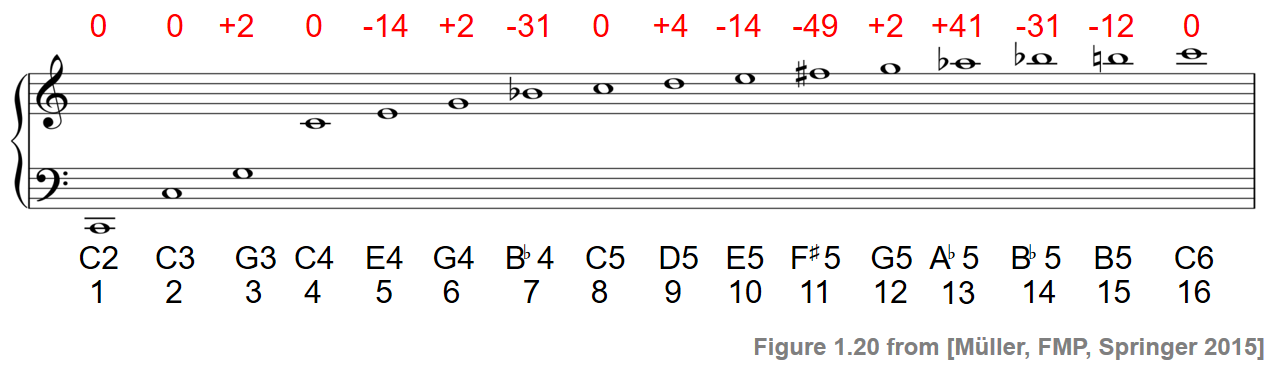

In [16]:
Image("../img/2.music_representation/FMP_C1_F20.png", width=500, height=500)

- 예를 들어, 세 번째 고조파의 주파수는 G3의 중심 주파수보다 겨우 2센트 높은데, 이는 눈에 보이는 차이보다 훨씬 작다. 
- 이와 대조적으로 11차 고조파의 주파수는 음표 F5의 중심 주파수보다 49센트 낮으며, 이는 반음에 가깝우며 또렷하게 들린다. 
- 만약 고조파가 (주파수를 2의 거듭제곱으로 적절히 곱하거나 나누어서) 한 옥타브의 범위로 옮겨진다면, 그것들은 12톤 평균율의 특정 음에 근접한다. 
- 열두 음계 중 C(1차 고조파), G(3차 고조파), D(9차 고조파)는 근사치가 좋은 반면, F(11차 고조파), A$^\flat$(13차 고조파) 또는 B$^\flat$(7차 고조파)는 문제가 있다.

- 아래의 코드는 위 그림에 나온 16개 고조파와 16개 중심주파수를 모두 정현파로 생성한다.

In [17]:
# Computation of frequencies and differences
p = 36
freq = f_pitch(p)
freq_harmonic = (np.asarray(range(16)) + 1) * freq
sinusoid_freq_harmonic = []
notes = np.asarray([36, 48, 55, 60, 64, 67, 70, 72, 74, 76, 78, 79, 80, 82, 83, 84])
freq_center = f_pitch(notes)
sinusoid_freq_center = []
freq_deviation_cents = difference_cents(freq_harmonic, freq_center)

# Generation of sinusoids
dur = 1  # seconds
Fs = 4000  # sampling rate

for freq in freq_center:
    x, t = generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_center.append(x)

for freq in freq_harmonic:
    x, t = generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_harmonic.append(x)    

# Generation of html table    
audio_tag_html_center = []
for i in range(len(freq_center)):
    audio_tag = ipd.Audio(sinusoid_freq_center[i], rate=Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', '<audio style="width: 100px; "')  
    audio_tag_html_center.append(audio_tag_html)
    
audio_tag_html_harmonic = []
for i in range(len(freq_harmonic)):
    audio_tag = ipd.Audio(sinusoid_freq_harmonic[i], rate = Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', '<audio style="width: 100px; "')    
    audio_tag_html_harmonic.append(audio_tag_html)

pd.set_option('display.max_colwidth', None)    
df = pd.DataFrame(OrderedDict([('Note', ['C2', 'C3', 'G3', 'C4', 'E4', 'G4',
                                         'B$^\\flat$4', 'C5', 'D5', 'E5', 'F$^\sharp$5',
                                         'G5', 'A$^\\flat$5', 'B$^\\flat$5', 'B5', 'C6']),
                               ('Note Freq. (Hz)', freq_center),
                               ('Note Sinusoid', audio_tag_html_center),                               
                               ('Harmonic Freq. (Hz)', freq_harmonic),
                               ('Harmonic Sinusoid', audio_tag_html_harmonic),                               
                               ('Deviation (Cents)', freq_deviation_cents)]))

df.index = np.arange(1, len(df) + 1)
ipd.HTML(df.to_html(escape=False, float_format='%.2f'))

- 다음 코드 셀에서, 각각 16개의 고조파 주파수와 16개의 중심 주파수에 대해 정현파를 중첩(superimpose)한다. 
- 첫 번째 경우에는 균일한 소리(단일 음으로 인식됨)를 얻는 반면, 두 번째 소리는 더 이질적이다.

In [18]:
num_sinusoid = 16
x_all_harmonic = sinusoid_freq_harmonic[0]
x_all_center = sinusoid_freq_center[0]
for i in range(num_sinusoid-1):
    x_all_harmonic = x_all_harmonic + sinusoid_freq_harmonic[i+1]    
    x_all_center = x_all_center + sinusoid_freq_center[i+1]

x_all_harmonic = x_all_harmonic / num_sinusoid
x_all_center = x_all_center / num_sinusoid

print('Superposition of sinusoids with frequencies from harmonics:')
ipd.display(ipd.Audio(data=x_all_harmonic, rate=Fs))
print('Superposition of sinusoids with frequencies from notes:')
ipd.display(ipd.Audio(data=x_all_center, rate=Fs))

Superposition of sinusoids with frequencies from harmonics:


Superposition of sinusoids with frequencies from notes:


# 피타고라스 튜닝

https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1E10_PythagoreanTuning.html

---
# 다이나믹, 인텐시티 및 라우드니스 Dynamics, Intensity, and Loudness

**데시벨 스케일 (Decibel Scale)**

- 음악의 중요한 특성은 음량을 나타내는 음악 기호뿐만 아니라 음량을 나타내는 일반적인 용어인 다이나믹스(**dynamics**)와 관련이 있다. 
- 물리적 관점에서 소리 힘(**sound power**)은 공기를 통해 모든 방향으로 흐르는 음원에 의해 단위 시간당 얼마나 많은 에너지가 방출되는지를 나타낸다. 
- 소리 강도(**sound intensity**)는 단위 면적당 소리 힘을 나타낸다. 실제로 소리 힘과 소리 강도는 인간 청취자와 연관된 극히 작은 값을 보여줄 수 있다. 예를 들어, 인간이 들을 수 있는 순수 음색(pure tone)의 최소 소리 강도인 **청각의 임계값**(**threshold of hearing, TOH**)은 다음과 같이 작다.

$$I_\mathrm{TOH}:=10^{-12}~\mathrm{W}/\mathrm{m}^2.$$

- 게다가, 인간이 지각할 수 있는 강도(intensity)의 범위는 $I_\mathrm{TOP}:=10~\mathrm{W}/\mathrm{m}^2$ (**통증 임계값**(TOP))으로 매우 크다. 
- 실질적인 이유로, 힘과 강도를 표현하기 위해 로그 척도로 전환한다. 더 정확하게는 두 값 사이의 비율을 나타내는 로그 단위인 **데시벨**(dB) 척도를 사용한다. 
- 일반적으로 sound intensity의 경우 $I_\mathrm{TOH}$과 같은 값 중 하나가 참조 역할을 한다.  
- 그런 다음 dB에서 측정된 강도는 다음과 같이 정의된다.

$$ \mathrm{dB}(I) := 10\cdot \log_{10}\left(\frac{I}{I_\mathrm{TOH}}\right)$$

- 위의 정의에서 From this definition, one obtains $\mathrm{dB}(I_\mathrm{TOH})=0$를 얻을 수 있고, 강도가 두배로 증가하면 대략 3dB 증가한다:
$$\mathrm{dB}(2\cdot I) = 10\cdot \log_{10}(2) + \mathrm{dB}(I) \approx 3 + \mathrm{dB}(I)$$

- 데시벨 단위로 강도 값을 지정할 때 **강도 수준**(intensity levels)도 언급된다. 
- 다음 표는 $\mathrm{W}/\mathrm{m}^2$ 와 데시벨 단위로 몇 가지 일반적인 강도값(intensity value)을 보여준다.

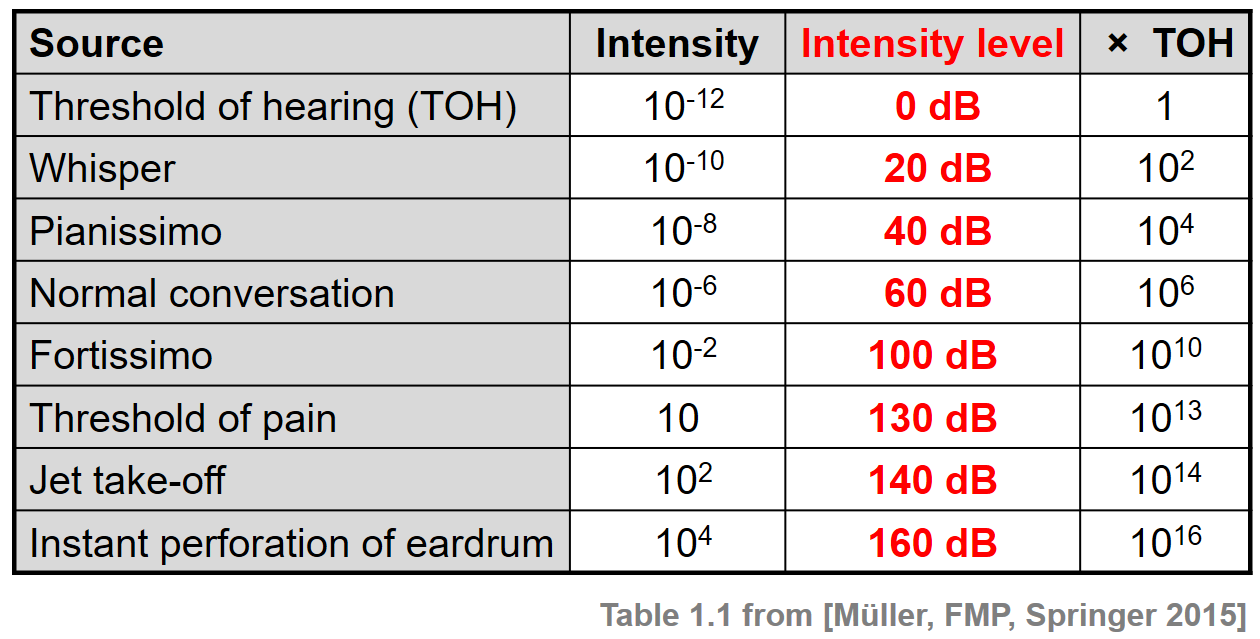

In [107]:
Image("../img/2.music_representation/FMP_C1_T01.png", width=400, height=400)

예시
-  베토벤 5번 교항곡 시작 부분

<audio src="../audio/beeth5_orch_21bars.wav" type="audio/mpeg" controls="controls"></audio>

In [19]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    """Computation of the signal power in dB

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        Fs (scalar): Sampling rate
        win_len_sec (float): Length (seconds) of the window (Default value = 0.1)
        power_ref (float): Reference power level (0 dB) (Default value = 10**(-12))

    Returns:
        power_db (np.ndarray): Signal power in dB
    """
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

In [108]:
Fs = 22050
x, Fs = librosa.load("../audio/beeth5_orch_21bars.wav", sr=Fs, mono=True)

win_len_sec = 0.2
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

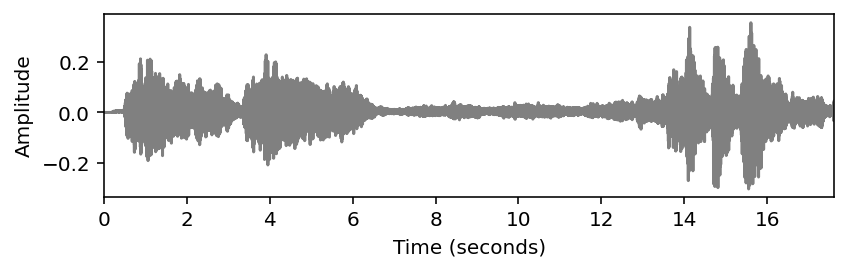

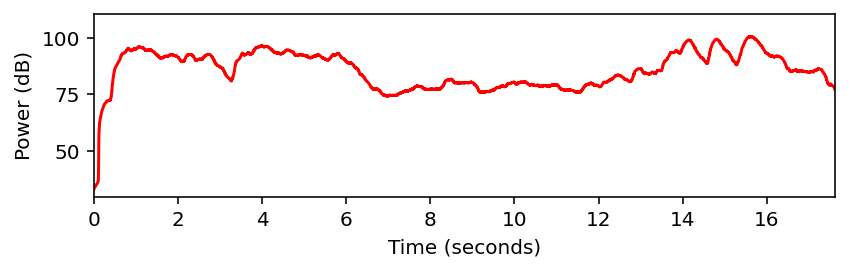

In [109]:
plot_signal(x, Fs, ylabel='Amplitude', color='gray')
plot_signal(power_db, Fs, ylabel='Power (dB)', color='red')
plt.show()

**라우드니스(Loudness)**

- Dynamics과 소리 강도는 소리가 조용한 것에서 큰 것으로 확장되는 규모로 소리를 정렬할 수 있는 라우드니스(loudness)라고 불리는 지각적 특성과 관련이 있다. 
- 라우드니스는 주관적인 측정이며, 이는 개별 청취자(예: 나이는 소리에 대한 인간의 귀의 반응에 영향을 미치는 요인 중 하나)뿐만 아니라 지속 시간(duration) 또는 주파수와 같은 다른 소리 특성에도 영향을 미친다. 
    - 예를 들어, 사람은 200ms 동안 지속되는 소리가 50ms 동안만 지속되는 유사한 소리보다 더 크게 느껴진다. 
    - 게다가, 강도는 같지만 주파수가 다른 두 소리는 일반적으로 동일한 라우드니스로 인식되지 않는다. 
    - 정상적인 청력을 가진 사람은 2~4kHz 정도의 소리에 가장 민감하며, 낮은 주파수뿐만 아니라 높은 주파수에서도 감도가 감소한다. 

- 정신음향(psychoacoustic) 실험을 바탕으로 주파수에 따른 순수톤의 라우드니스는 단위 폰(unit phon)으로 결정되고 표현되어 왔다. 
- 다음 그림은 동일한 음량 윤곽선(equal loudness contours)을 보여준다. 각 윤곽선은 폰(phon)으로 주어진 고정된 음량에 대해 (로그로 간격을 둔) 주파수 축에 대한 소리 강도를 지정한다. 하나의 폰 단위는 1000Hz의 주파수에 대해 정규화되며, 여기서 하나의 폰 값은 dB 단위의 강도 수준과 같다. 0 폰의 윤곽선은 주파수에 따라 청각 임계값(threshold of hearing)이 어떻게 달라지는지를 보여준다.

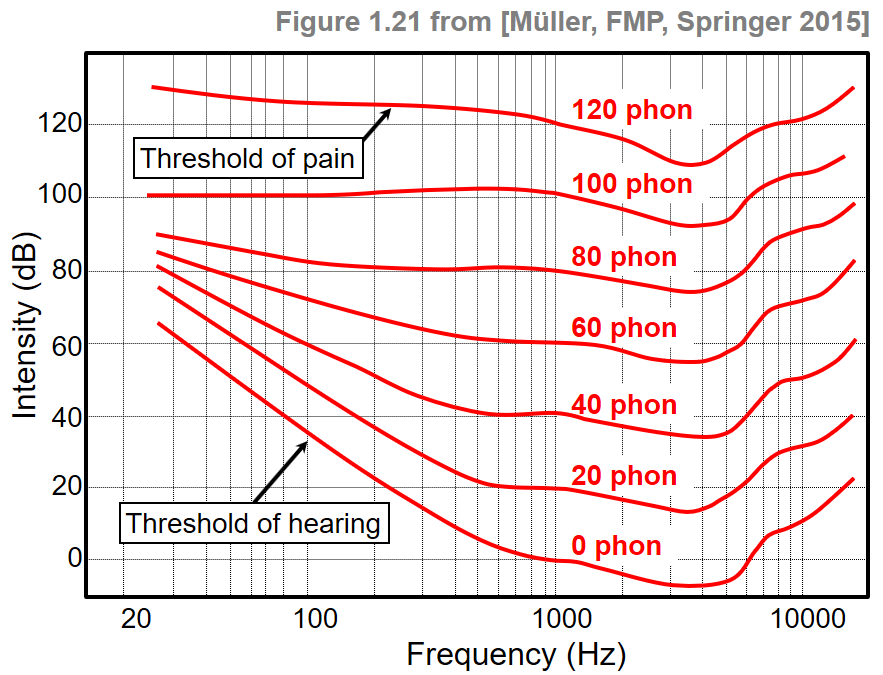

In [22]:
Image("../img/2.music_representation/FMP_C1_F21.png", width=400, height=400)

- 윤곽선은 가중치 함수에 의해 대략적으로 설명될 수 있다. 다음 코드 셀에서 동일한 음량 윤곽선에 질적으로 근사하는 함수의 예를 찾을 수 있다.

In [23]:
def compute_equal_loudness_contour(freq_min=30, freq_max=15000, num_points=100):
    """Computation of the equal loudness contour

    Args:
        freq_min (float): Lowest frequency to be evaluated (Default value = 30)
        freq_max (float): Highest frequency to be evaluated (Default value = 15000)
        num_points (int): Number of evaluation points (Default value = 100)

    Returns:
        equal_loudness_contour (np.ndarray): Equal loudness contour (in dB)
        freq_range (np.ndarray): Evaluated frequency points
    """
    freq_range = np.logspace(np.log10(freq_min), np.log10(freq_max), num=num_points)
    freq = 1000
    # Function D from https://bar.wikipedia.org/wiki/Datei:Acoustic_weighting_curves.svg
    h_freq = ((1037918.48 - freq**2)**2 + 1080768.16 * freq**2) / ((9837328 - freq**2)**2 + 11723776 * freq**2)
    n_freq = (freq / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq / ((freq**2 + 79919.29) * (freq**2 + 1345600)))
    h_freq_range = ((1037918.48 - freq_range**2)**2 + 1080768.16 * freq_range**2) / ((9837328 - freq_range**2)**2
                                                                                     + 11723776 * freq_range**2)
    n_freq_range = (freq_range / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq_range / ((freq_range**2 + 79919.29) *
                                                                         (freq_range**2 + 1345600)))
    equal_loudness_contour = 20 * np.log10(np.abs(n_freq / n_freq_range))
    return equal_loudness_contour, freq_range

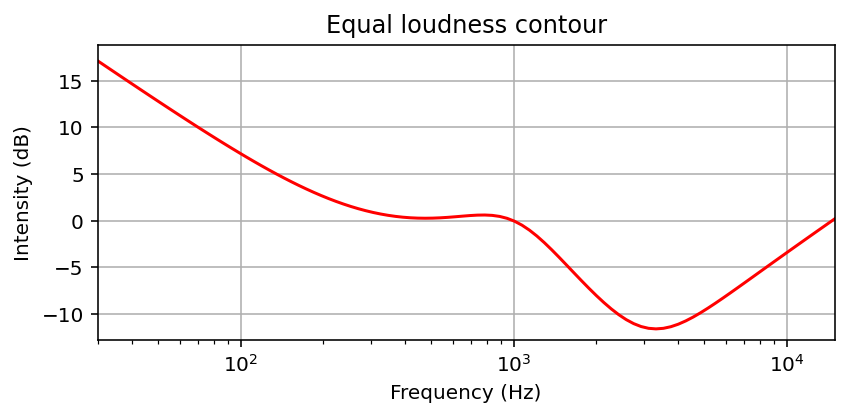

In [24]:
equal_loudness_contour, freq_range = compute_equal_loudness_contour()

plot_signal(equal_loudness_contour, T_coef=freq_range, figsize=(6,3), xlabel='Frequency (Hz)',
            ylabel='Intensity (dB)', title='Equal loudness contour', color='red')
plt.xscale('log')
plt.grid()
plt.show()

**Chirp Signal with Equal Power**

- 이제 30Hz에서 시작하여 10000Hz로 끝나는, 주파수가 기하급수적으로 증가하는 차프 신호에 대한 작은 실험을 수행해보자. 
- 먼저, 전체 시간 간격에 걸쳐 동일한 강도의 차프 신호를 생성한다. 이 신호를 들을 때는 주파수가 증가함에 따라 신호가 먼저 커지고 약 4000Hz의 주파수를 지나면 다시 부드러워지는 느낌이 든다.

In [25]:
def generate_chirp_exp(dur, freq_start, freq_end, Fs=22050):
    """Generation chirp with exponential frequency increase

    Args:
        dur (float): Length (seconds) of the signal
        freq_start (float): Start frequency of the chirp
        freq_end (float): End frequency of the chirp
        Fs (scalar): Sampling rate (Default value = 22050)

    Returns:
        x (np.ndarray): Generated chirp signal
        t (np.ndarray): Time axis (in seconds)
        freq (np.ndarray): Instant frequency (in Hz)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    freq = np.exp(np.linspace(np.log(freq_start), np.log(freq_end), N))
    phases = np.zeros(N)
    for n in range(1, N):
        phases[n] = phases[n-1] + 2 * np.pi * freq[n-1] / Fs
    x = np.sin(phases)
    return x, t, freq

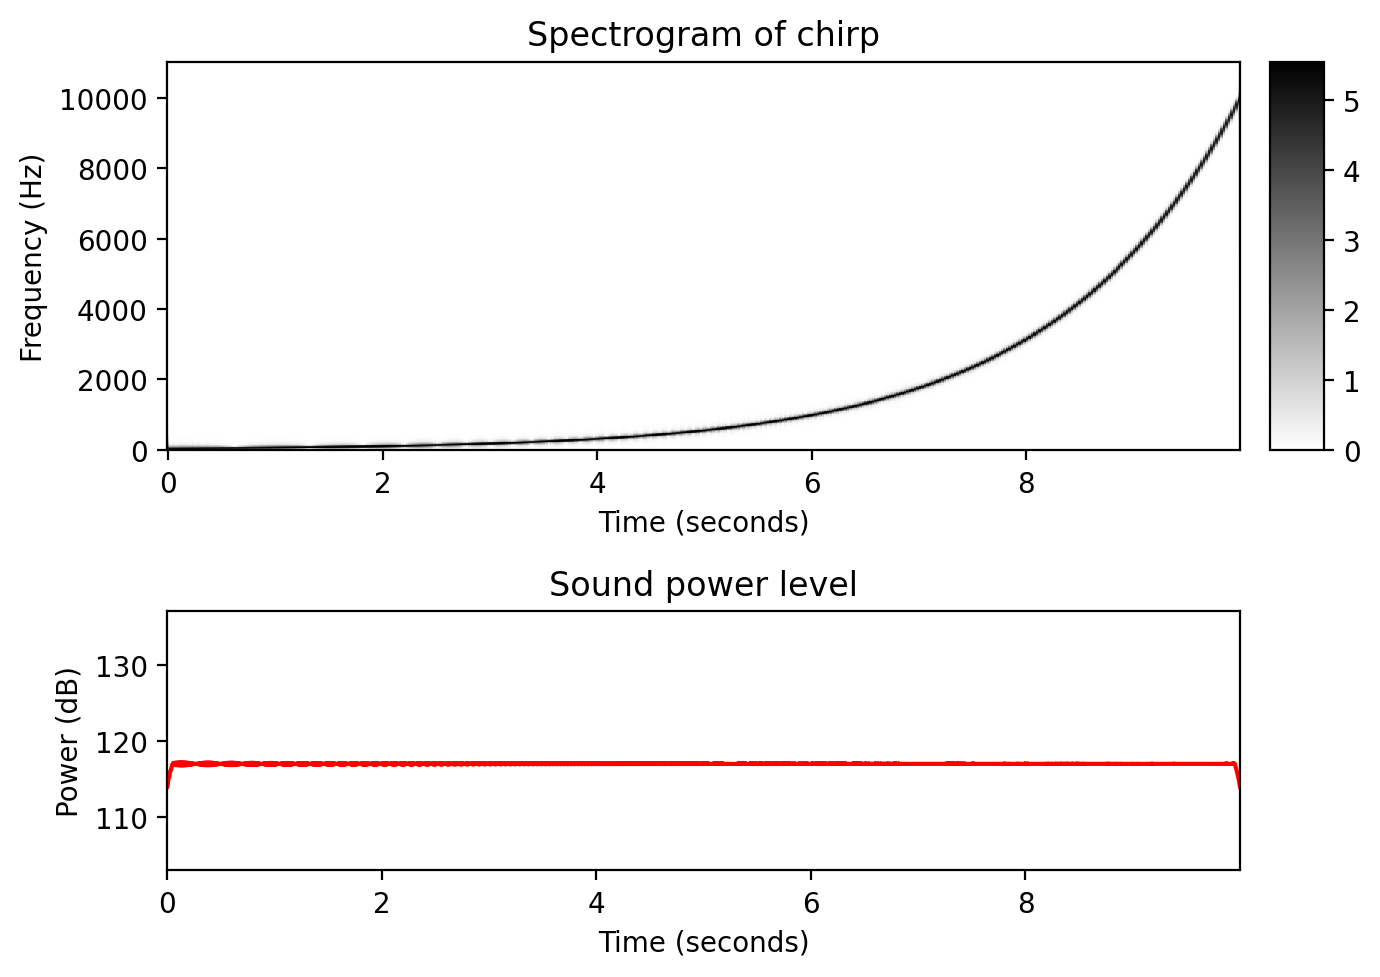

In [26]:
Fs = 22050
freq_start = 30 
freq_end = 10000
dur = 10
x, t, freq = generate_chirp_exp(dur, freq_start, freq_end, Fs=Fs)


fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [3, 2]}, figsize=(7, 5))
N, H = 1024, 512
X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, pad_mode='constant')
plot_matrix(np.log(1+np.abs(X)), Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0], ax[0,1]], 
            title='Spectrogram of chirp', colorbar=True)

win_len_sec = 0.1
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)
plot_signal(power_db, Fs=Fs, ax=ax[1,0], title='Sound power level', ylabel='Power (dB)', color='red')
ax[1,0].set_ylim([103, 137])
ax[1,1].set_axis_off()
plt.tight_layout()
plt.show()

display(Audio(x, rate=Fs) )

**Chirp Signal with Equal Loudness**

- 둘째로, 위에서 생성된 equal loudness 윤곽에 따라 신호의 진폭(amplitude)을 조정한다. 
- 이 경우 전체 주파수 범위를 통해 스위핑할 때 결과로 발생하는 chirp 신호의 loudness이 동일한 것으로 보인다.

In [27]:
def generate_chirp_exp_equal_loudness(dur, freq_start, freq_end, Fs=22050):
    """Generation chirp with exponential frequency increase and equal loudness

    Args:
        dur (float): Length (seconds) of the signal
        freq_start (float): Starting frequency of the chirp
        freq_end (float): End frequency of the chirp
        Fs (scalar): Sampling rate (Default value = 22050)

    Returns:
        x (np.ndarray): Generated chirp signal
        t (np.ndarray): Time axis (in seconds)
        freq (np.ndarray): Instant frequency (in Hz)
        intensity (np.ndarray): Instant intensity of the signal
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    intensity, freq = compute_equal_loudness_contour(freq_min=freq_start, freq_max=freq_end, num_points=N)
    amp = 10**(intensity / 20)
    phases = np.zeros(N)
    for n in range(1, N):
        phases[n] = phases[n-1] + 2 * np.pi * freq[n-1] / Fs
    x = amp * np.sin(phases)
    return x, t, freq, intensity

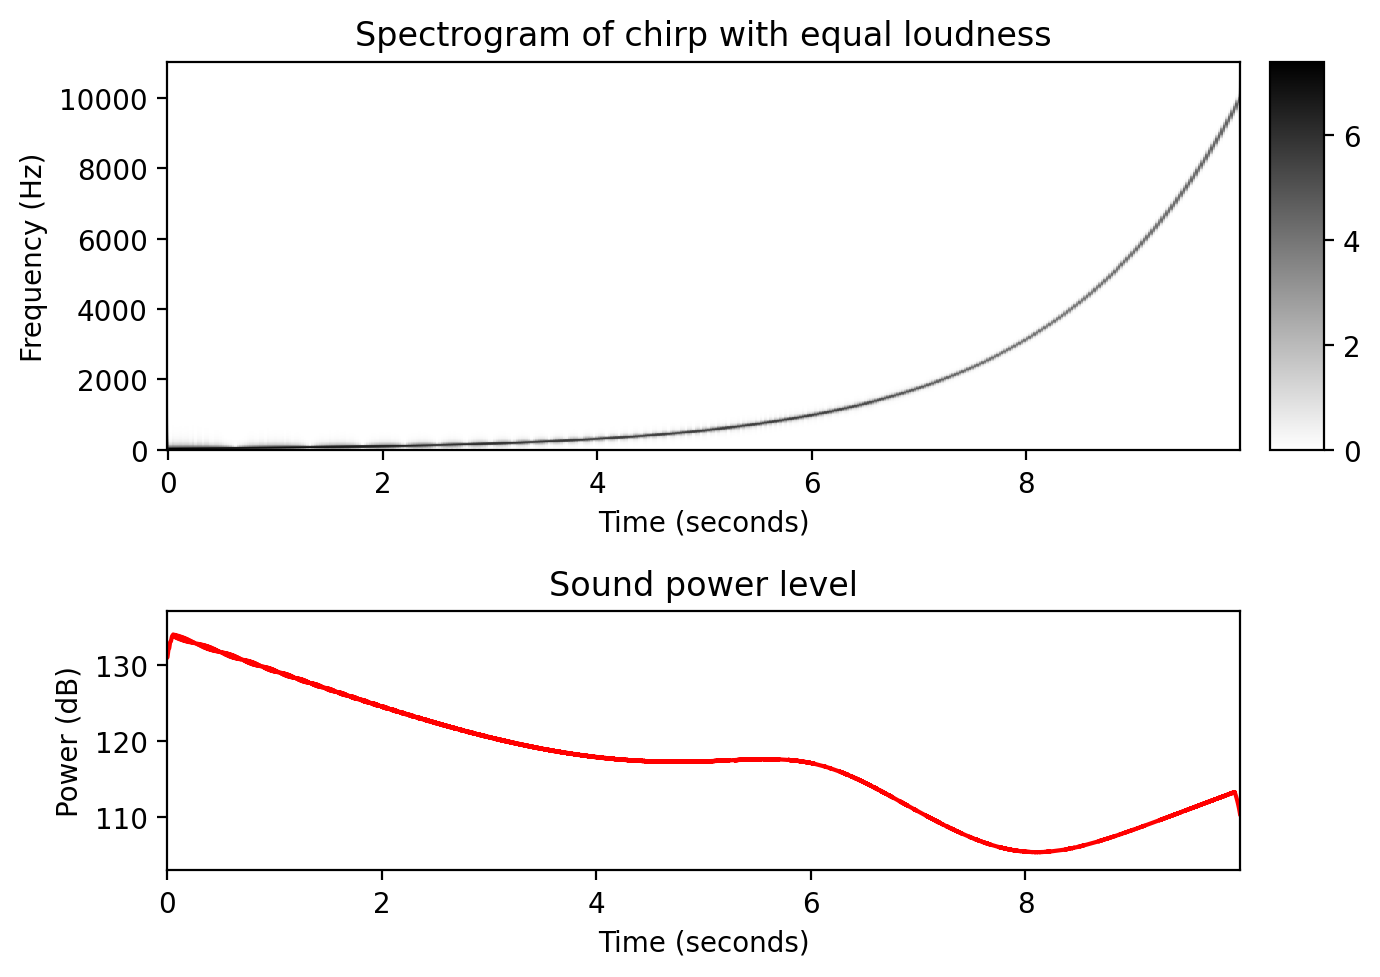

In [28]:
x_equal_loudness, t, freq, intensity = generate_chirp_exp_equal_loudness(dur, freq_start, freq_end, Fs=Fs)

fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [3, 2]}, figsize=(7, 5))
N, H = 1024, 512
X = librosa.stft(x_equal_loudness, n_fft=N, hop_length=H, win_length=N, pad_mode='constant')
plot_matrix(np.log(1+np.abs(X)), Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0], ax[0,1]], 
                     title='Spectrogram of chirp with equal loudness', colorbar=True)

win_len_sec = 0.1
power_db = compute_power_db(x_equal_loudness, win_len_sec=win_len_sec, Fs=Fs)
plot_signal(power_db, Fs=Fs, ax=ax[1,0], title='Sound power level', ylabel='Power (dB)', color='red')
ax[1,0].set_ylim([103, 137])
ax[1,1].set_axis_off()
plt.tight_layout()
plt.show()

display( Audio(x_equal_loudness, rate=Fs) )

---
# 음색 (Timbre)

- 음높이, 음량, 지속 시간 외에도 음색(timbre) 또는 톤 컬러(tone color)라고 하는 사운드의 또 다른 기본적인 측면이 있다. 
- 음색을 사용하면 바이올린, 오보에 또는 트럼펫의 음색이 같은 음높이와 같은 크기로 연주되더라도 청취자가 음악적 음색을 구별할 수 있다. 
- 음색의 측면은 파악하기가 매우 어렵고 주관적이다. 
    - 예를 들어, 악기 소리는 밝다, 어둡다, 따뜻하다, 거칠다 등의 단어로 설명될 수 있다. 
- 연구원들은 시간 및 스펙트럼 변화, 음조 및 잡음과 같은 구성 요소의 유무 또는 음의 일부 부분에 대한 에너지 분포와 같은 보다 객관적인 사운드 특성과의 상관 관계를 살펴봄으로써 음색에 접근하려고 했다.

## **Envelope and ADSR Model**

- 소리의 음색에 영향을 미치는 한 가지 소리 특성은 파형의 **envelope**이며, 이는 진폭에서 극단을 나타내는 매끄러운 곡선으로 간주될 수 있다. 
- 음향 합성에서 생성되는 신호의 envelope는 어택(attack, A), 디케이(decay, D), 서스테인(sustain, S), 릴리스(release, R) 단계로 구성된 **ADSR**이라는 모델에 의해 종종 설명된다. 
- 4단계의 상대적 지속 시간과 진폭은 합성된 음색이 어떻게 들릴지에 큰 영향을 미친다. 
- 다음 그림은 이상화된 ADSR 모델과 피아노와 바이올린 사운드의 엔벨로프(단음 C4 재생)를 보여준다.

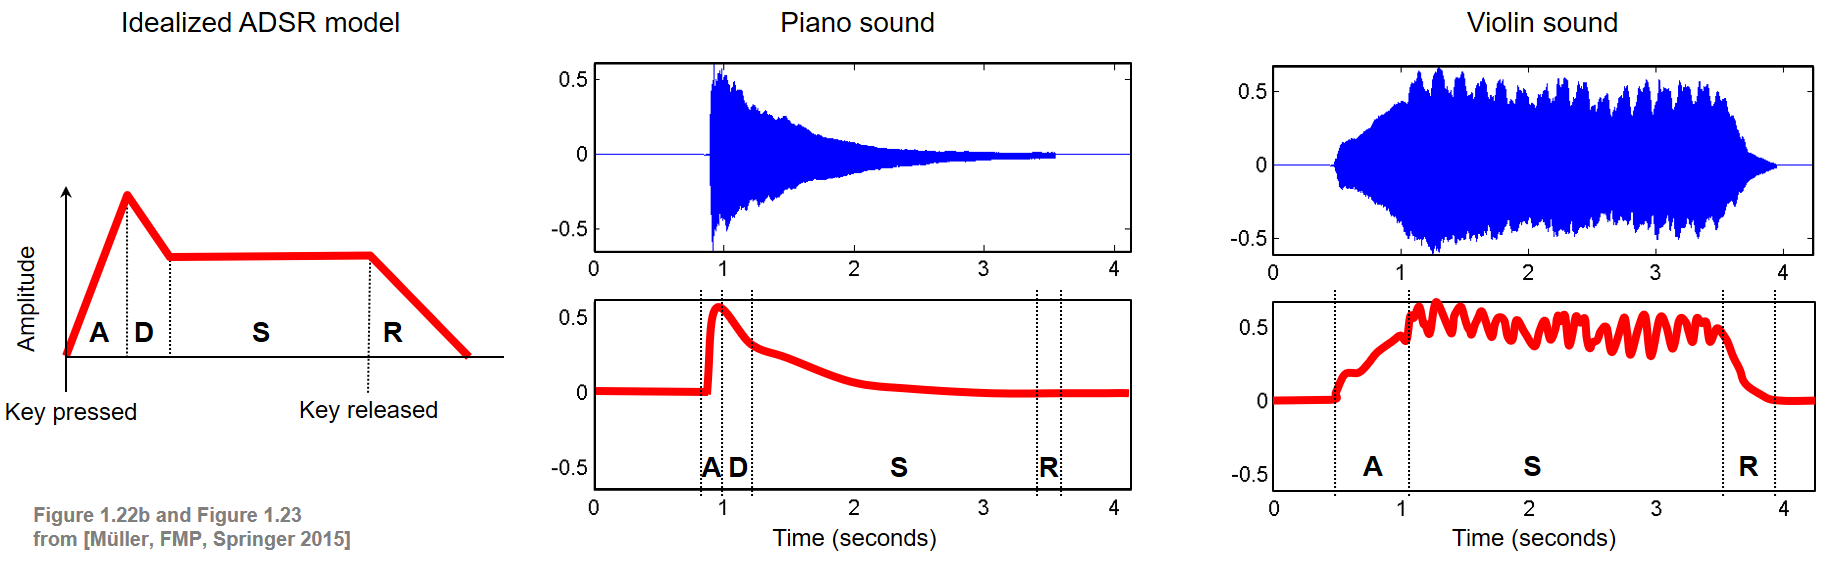

In [19]:
Image("../img/2.music_representation/FMP_C1_F22a-23.png", width=800, height=800)

- 그림에서 알 수 있듯이, 하나의 음을 연주하면 이미 주기적인 요소뿐만 아니라 비주기적인 요소를 포함하여 시간이 지남에 따라 지속적으로 변화할 수 있는 특성을 가진 복잡한 음향 혼합물이 생성된다.
- **어택**(attack) 단계 동안, 소리는 보통 넓은 주파수 범위에 걸쳐 노이즈와 같은 구성 요소로 축적된다. 소리가 시작될 때 소음과 같은 짧은 지속 시간의 소리를 종종 과도음(transient)이라고 한다.
- **디케이**(decay) 단계 동안, 소리는 안정화되고 일정한 주기 패턴에 도달한다.
- **서스테인**(sustain) 단계 동안, 에너지는 꽤 일정하게 유지된다.
- **릴리스**(release) 단계에서는 소리가 사라진다.
- 다음 코드 셀에서, 우리는 이상화된 ADSR 모델을 생성한다.

In [20]:
def compute_adsr(len_A=10, len_D=10, len_S=60, len_R=10, height_A=1.0, height_S=0.5):
    """Computation of idealized ADSR model

    Args:
        len_A (int): Length (samples) of A phase (Default value = 10)
        len_D (int): Length (samples) of D phase (Default value = 10)
        len_S (int): Length (samples) of S phase (Default value = 60)
        len_R (int): Length (samples) of R phase (Default value = 10)
        height_A (float): Height of A phase (Default value = 1.0)
        height_S (float): Height of S phase (Default value = 0.5)

    Returns:
        curve_ADSR (np.ndarray): ADSR model
    """
    curve_A = np.arange(len_A) * height_A / len_A
    curve_D = height_A - np.arange(len_D) * (height_A - height_S) / len_D
    curve_S = np.ones(len_S) * height_S
    curve_R = height_S * (1 - np.arange(1, len_R + 1) / len_R)
    curve_ADSR = np.concatenate((curve_A, curve_D, curve_S, curve_R))
    return curve_ADSR

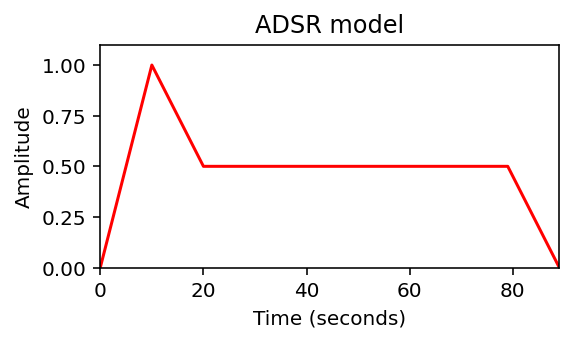

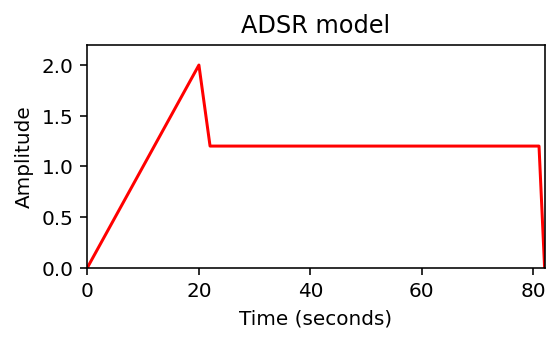

In [21]:
curve_ADSR = compute_adsr(len_A=10, len_D=10, len_S=60, len_R=10, height_A=1.0, height_S=0.5)

plot_signal(curve_ADSR, figsize=(4,2.5), ylabel='Amplitude', title='ADSR model', color='red')
plt.show()

curve_ADSR = compute_adsr(len_A=20, len_D=2, len_S=60, len_R=1, height_A=2.0, height_S=1.2)
plot_signal(curve_ADSR, figsize=(4,2.5), ylabel='Amplitude', title='ADSR model', color='red')
plt.show()

- ADSR 모델은 단순화된 것이며 특정 악기에서 생성되는 톤의 진폭 엔벨로프에 대한 의미 있는 근사치만 산출한다. 
- 예를 들어, 위와 같은 바이올린 소리는 ADSR 모델에 의해 잘 근사되지 않는다. 
    - 우선 음량을 점차 늘려가며 부드럽게 연주하기 때문에 공격 국면이 퍼진다. 게다가, decay 단계가 없는 것처럼 보이고 그 이후의 sustain 단계는 일정하지 않다; 대신 진폭 엔벨로프는 규칙적인 방식으로 진동한다. 바이올린 연주자가 활로 현을 켜는 것을 멈추면 해제 단계가 시작된다. 그리고 나서 그 소리는 빠르게 사라진다.

## **엔벨로프 계산**

- 파형의 엔벨로프를 계산하는 방법은 여러 가지가 있다. 다음에서는 각 윈도우 섹션에 최대 필터를 적용하여 간단한 슬라이딩 윈도우 방식을 사용한다. 다음 코드 셀에서는 주어진 파형의 상한 엔벨로프와 하한 엔벨로프 및 파형의 크기 엔벨로프를 계산한다.

In [22]:
def compute_envelope(x, win_len_sec=0.01, Fs=4000):
    """Computation of a signal's envelopes

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        win_len_sec (float): Length (seconds) of the window (Default value = 0.01)
        Fs (scalar): Sampling rate (Default value = 4000)

    Returns:
        env (np.ndarray): Magnitude envelope
        env_upper (np.ndarray): Upper envelope
        env_lower (np.ndarray): Lower envelope
    """
    win_len_half = round(win_len_sec * Fs * 0.5)
    N = x.shape[0]
    env = np.zeros(N)
    env_upper = np.zeros(N)
    env_lower = np.zeros(N)
    for i in range(N):
        i_start = max(0, i - win_len_half)
        i_end = min(N, i + win_len_half)
        env[i] = np.amax(np.abs(x)[i_start:i_end])
        env_upper[i] = np.amax(x[i_start:i_end])
        env_lower[i] = np.amin(x[i_start:i_end])
    return env, env_upper, env_lower
    
    
def compute_plot_envelope(x, win_len_sec, Fs, figsize=(6, 3), title=''):
    """Computation and subsequent plotting of a signal's envelope

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        win_len_sec (float): Length (seconds) of the window
        Fs (scalar): Sampling rate
        figsize (tuple): Size of the figure (Default value = (6, 3))
        title (str): Title of the figure (Default value = '')

    Returns:
        fig (mpl.figure.Figure): Generated figure
    """
    t = np.arange(x.size)/Fs
    env, env_upper, env_lower = compute_envelope(x, win_len_sec=win_len_sec, Fs=Fs)
    fig = plt.figure(figsize=figsize)
    plt.plot(t, x, color='gray', label='Waveform')
    plt.plot(t, env_upper, linewidth=2, color='cyan', label='Upper envelope')
    plt.plot(t, env_lower, linewidth=2, color='blue', label='Lower envelope')
    plt.plot(t, env, linewidth=2, color='red', label='Magnitude envelope')
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([t[0], t[-1]])
    #plt.ylim([-0.7, 0.7])
    plt.legend(loc='lower right')
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))
    return fig

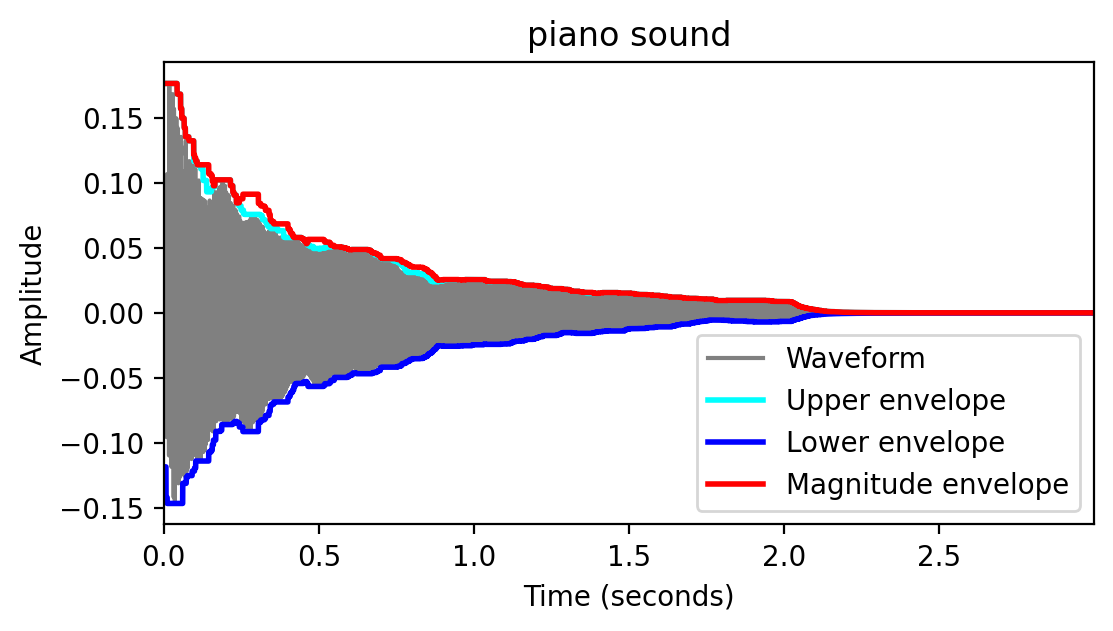

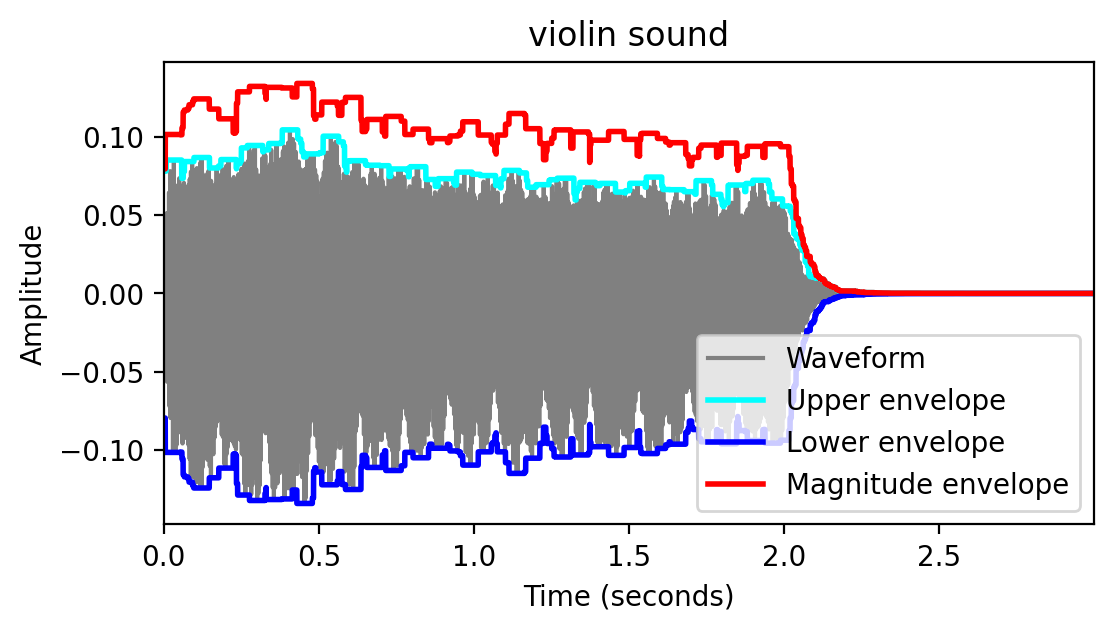

In [23]:
Fs = 11025
win_len_sec=0.05

x, Fs = librosa.load("../audio/piano_c4.wav", sr=Fs)
fig = compute_plot_envelope(x, win_len_sec=win_len_sec, Fs=Fs, title='piano sound')

x, Fs = librosa.load("../audio/violin_c4.wav", sr=Fs)
fig = compute_plot_envelope(x, win_len_sec=win_len_sec, Fs=Fs, title='violin sound')

## **비브라토, 트레몰로 Vibrato and Tremolo**



- 바이올린의 예에서 음색과 관련된 다른 현상들이 나타난다. 예를 들어, 진폭의 주기적인 변화를 관찰할 수 있다. 이러한 진폭 변조는 **트레몰로**(tremolo)로도 알려져 있다. 
- 트레몰로의 효과는 진동수의 규칙적인 변화(주파수 변조)로 구성된 음악적 효과인 비브라토와 함께 종종 동반된다. 
- 현악 이외에도 비브라토는 인간 가수들이 표현을 더하기 위해 주로 사용된다. 트레몰로와 비브라토가 단순히 강도와 주파수의 국소적인 변화라고 할지라도, 그것들이 반드시 전체적인 음조의 음량이나 음조의 지각된 변화를 불러일으키지는 않는다. 오히려, 그것들은 음악적 음색에 영향을 미치는 특징들이다.
- 다음 코드 셀에서, 우리는 단순한 사인파, 비브라토가 있는 사인파, 트레몰로가 있는 사인파를 생성한다.

In [117]:
def generate_sinusoid_vibrato(dur=5, Fs=1000, amp=0.5, freq=440, vib_amp=1, vib_rate=5):
    """Generation of a sinusoid signal with vibrato

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        vib_amp (float): Amplitude (Hz) of the frequency oscillation (Default value = 1)
        vib_rate (float): Rate (Hz) of the frequency oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)

    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    freq_vib = freq + vib_amp * np.sin(t * 2 * np.pi * vib_rate)
    phase_vib = np.zeros(num_samples)
    for i in range(1, num_samples):
        phase_vib[i] = phase_vib[i-1] + 2 * np.pi * freq_vib[i-1] / Fs
    x = amp * np.sin(phase_vib)
    return x, t

def generate_sinusoid_tremolo(dur=5, Fs=1000, amp=0.5, freq=440, trem_amp=0.1, trem_rate=5):
    """Generation of a sinusoid signal with tremolo

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        trem_amp (float): Amplitude of the amplitude oscillation (Default value = 0.1)
        trem_rate (float): Rate (Hz) of the amplitude oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)
    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    amps = amp + trem_amp * np.sin(t * 2 * np.pi * trem_rate)
    x = amps * np.sin(2*np.pi*(freq*t))
    return x, t

In [138]:
Fs = 4000
dur = 5
freq = 220
amp = 0.5
figsize = (8,2)

x, t = generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=freq)
x_vib, t = generate_sinusoid_vibrato(dur=dur, Fs=Fs, amp=amp, freq=freq, vib_amp=6, vib_rate=5)
x_trem, t = generate_sinusoid_tremolo(dur=dur, Fs=Fs, amp=amp, freq=freq, trem_amp=0.3, trem_rate=5)

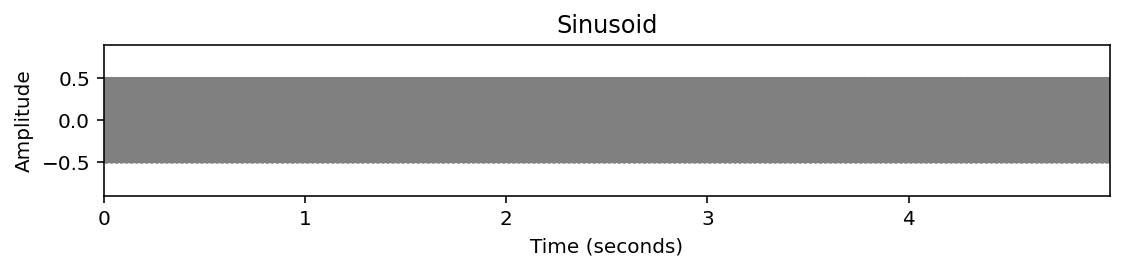

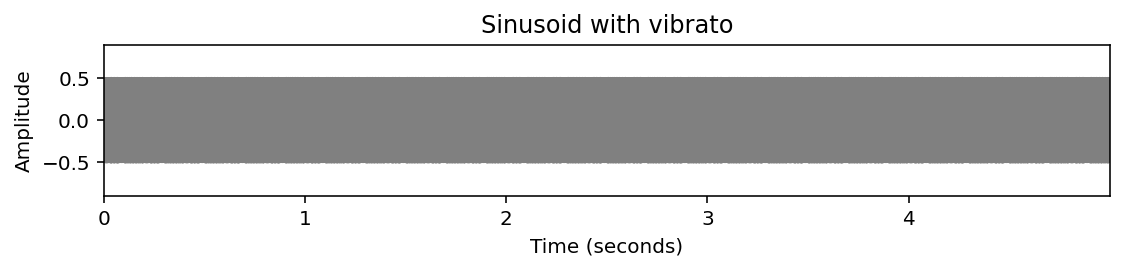

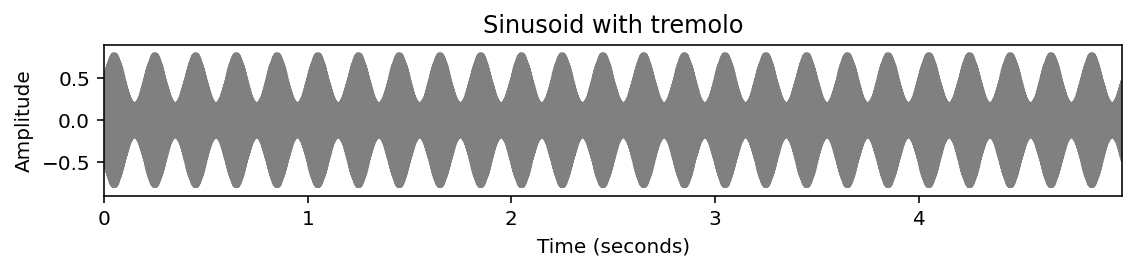

In [119]:
plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.show()
ipd.display(ipd.Audio(data=x, rate=Fs))

plot_signal(x_vib, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with vibrato')
plt.ylim([-0.9, 0.9])
plt.show()
ipd.display(ipd.Audio(data=x_vib, rate=Fs))

plot_signal(x_trem, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.show()
ipd.display(ipd.Audio(data=x_trem, rate=Fs))

**부분음/부분파 Partials**

- 아마도 음색을 특징짓는 가장 중요하고 잘 알려진 속성은 특정 부분파의 존재와 그 상대적 강점일 것이다. 
- 부분파는 음악 톤에서 **가장 낮은 부분이 기본 주파수(fundamental frequency)** 인 지배적인 주파수이다.
- 소리의 부분파는 스펙트로그램으로 시각화된다. 스펙트로그램은 시간 경과에 따른 주파수 성분의 intensity를 보여준다
- 비조화(inharmonicity)는 가장 가까운 이상고조파(ideal harmonic)에서 벗어나는 부분적 정도를 나타낸다. 
- 명확하게 인식할 수 있는 음정을 가진 음악적 톤과 같은 조화로운 소리의 경우, 대부분의 부분은 고조파(harmonics)에 가깝다. 그러나 모든 부분파가 동일한 강도로 발생할 필요는 없다. 다음 그림은 서로 다른 악기에서 재생되는 단일 노트 C4에 대한 스펙트로그램 표현을 보여준다.

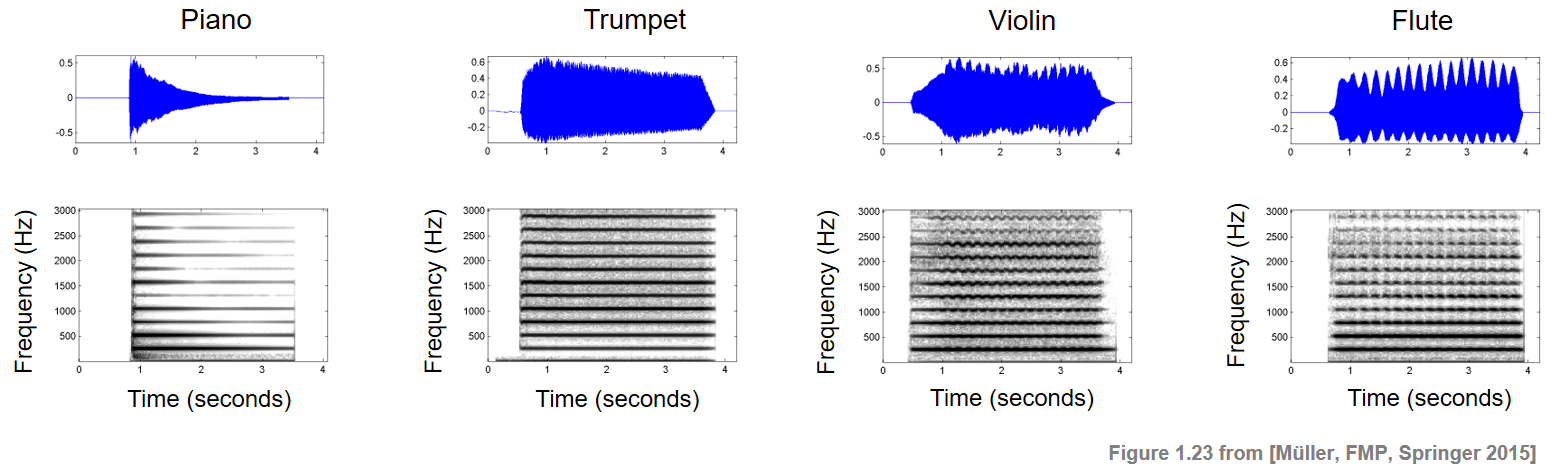

In [49]:
Image("../img/2.music_representation/FMP_C1_F23_FourInstruments.png", width=800, height=800)

- 음표의 기본 주파수(261.6Hz)와 고조파(261.6Hz의 정수 배수) 모두 수평 구조로 보일 수 있다. 
- 음악 톤의 디케이는 각각의 부분파에서 그에 상응하는 디케이에 의해 반영된다. 
- 톤의 에너지의 대부분은 낮은 부분에 포함되어 있고, 높은 부분에 대한 에너지는 낮은 경향이 있다. 이러한 분포는 많은 악기에서 일반적이다. 현악기의 경우, 소리는 풍부한 부분 스펙트럼을 갖는 경향이 있는데, 여기서 많은 에너지가 상부 고조파(harmonics)에도 포함될 수 있다. 이 그림은 또한 트레몰로(특히 플루트의 경우)와 비브라토(특히 바이올린의 경우)를 보여준다.

**다른 예**

In [26]:
# pure tone
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*np.sin(2*np.pi*f0*t)
ipd.Audio(x, rate=sr)

Text(0.5, 0, 'Frequency (Hz)')

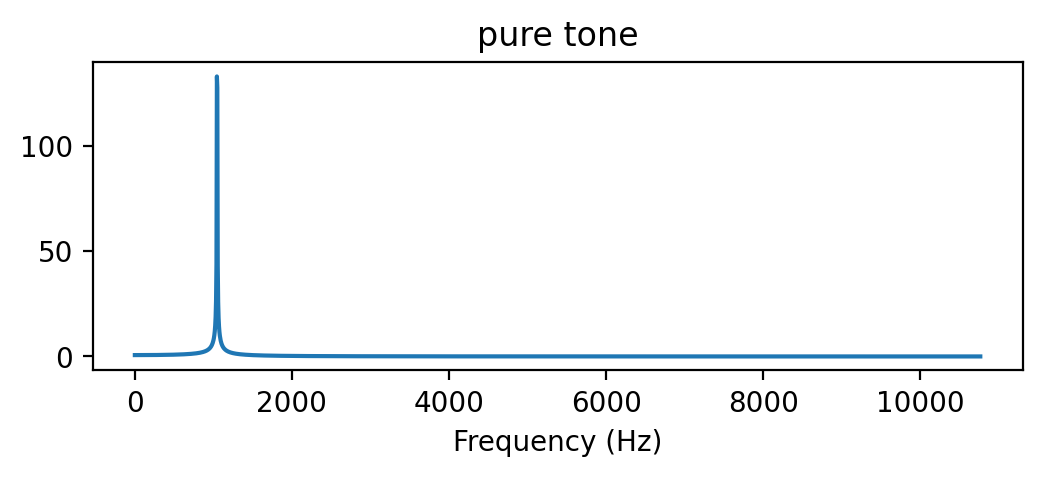

In [27]:
X = scipy.fft.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(6, 2))
plt.title('pure tone')
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

In [28]:
# oboe C6
x, sr = librosa.load('../audio/oboe_c6.wav')
print(x.shape)
ipd.Audio(x, rate=sr)

(23625,)


Text(0.5, 0, 'Frequency (Hz)')

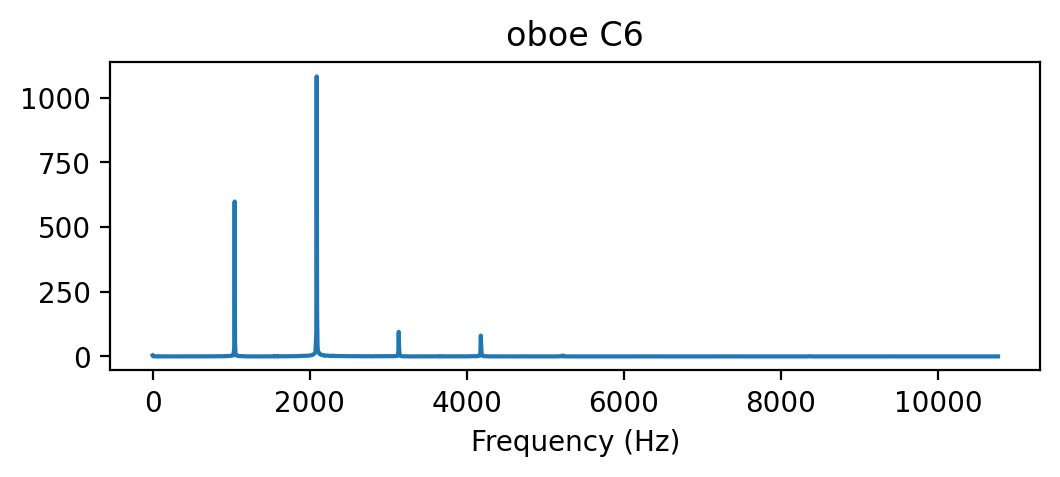

In [29]:
X = scipy.fft.fft(x[10000:14096])
X_mag = np.absolute(X)
plt.figure(figsize=(6, 2))
plt.title('oboe C6')
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

In [30]:
x, sr = librosa.load('../audio/clarinet_c6.wav')
print(x.shape)
ipd.Audio(x, rate=sr)

(51386,)


Text(0.5, 0, 'Frequency (Hz)')

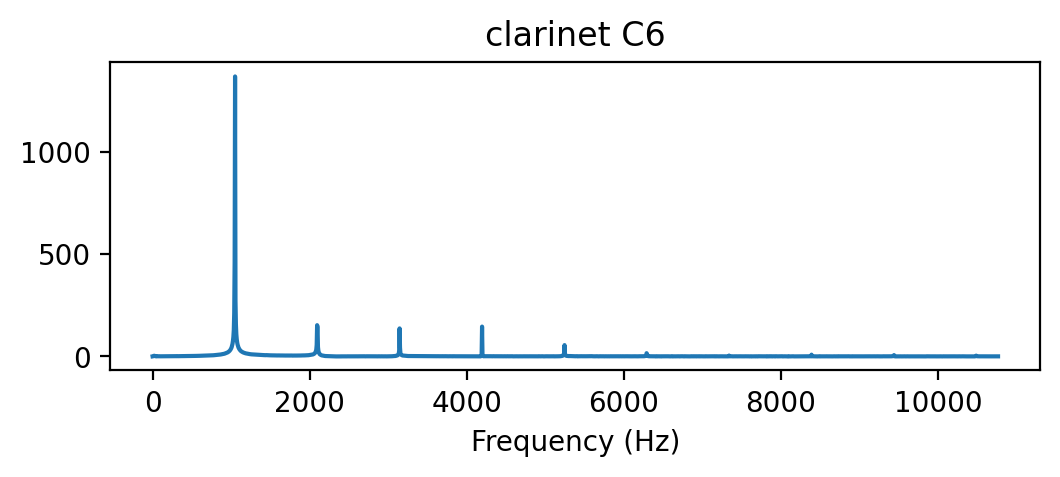

In [31]:
X = scipy.fft.fft(x[10000:14096])
X_mag = np.absolute(X)
plt.figure(figsize=(6, 2))
plt.title('clarinet C6')
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

- 부분파의 구성 요소의 상대적 진폭 차이에 주목해보자. 세 신호 모두 거의 동일한 피치와 기본 주파수를 가지고 있지만, 음색은 다르다.

**Missing Fundamental**

- 앞서 말했듯이, 소리의 음색은 결정적으로 고조파에 걸친 신호의 에너지 분포에 따라 달라진다. 또한, 인식된 피치의 지각은 기본 주파수뿐만 아니라 더 높은 고조파와 그들의 관계에 따라 달라진다. 예를 들어, 인간은 이 피치와 관련된 기본 주파수가 완전히 누락된 경우에도 톤의 피치를 감지할 수 있다. 이 현상은 **missing fundamental**로 알려져 있다.

- 다음 코드 예제에서는 음표의 중심 주파수(center frequency)의 정수 배수인 주파수를 가진 (가중된) 사인파를 추가하여 소리를 생성한다. 특히 순수한 톤(MIDI 피치 𝑝), 고조파가 있는 톤, missing fundamental의 고조파가 있는 톤, 순수한 톤(MIDI 피치 𝑝+12)을 생성한다.

In [32]:
def generate_tone(p=60, weight_harmonic=np.ones([16, 1]), Fs=11025, dur=2):
    """Generation of a tone with harmonics

    Args:
        p (float): MIDI pitch of the tone (Default value = 60)
        weight_harmonic (np.ndarray): Weights for the different harmonics (Default value = np.ones([16, 1])
        Fs (scalar): Sampling frequency (Default value = 11025)
        dur (float): Duration (seconds) of the signal (Default value = 2)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)
    """
    freq = 2 ** ((p - 69) / 12) * 440
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    x = np.zeros(t.shape)
    for h, w in enumerate(weight_harmonic):
        x = x + w * np.sin(2 * np.pi * freq * (h + 1) * t)
    return x, t

def plot_spectrogram(x, Fs=11025, N=4096, H=2048, figsize=(4, 2)):
    """Computation and subsequent plotting of the spectrogram of a signal

    Args:
        x: Signal (waveform) to be analyzed
        Fs: Sampling rate (Default value = 11025)
        N: FFT length (Default value = 4096)
        H: Hopsize (Default value = 2048)
        figsize: Size of the figure (Default value = (4, 2))

    """
    N, H = 2048, 1024
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')
    Y = np.abs(X)
    plt.figure(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max),
                             y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
    plt.ylim([0, 3000])
    # plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

Pure tone (p = 60):


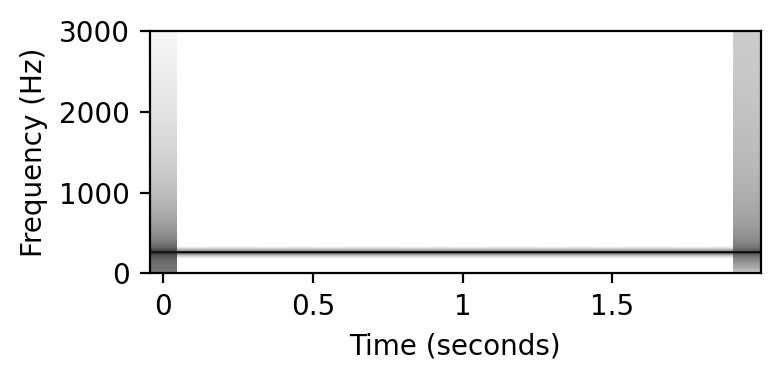

Tone with harmonics (p = 60):


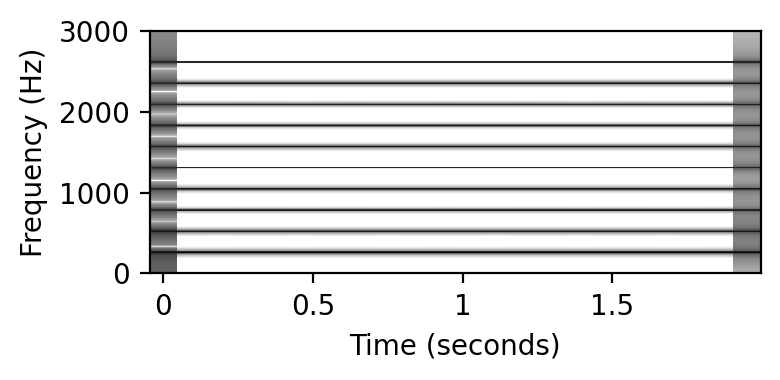

Tone with harmonics and missing fundamental (p = 60):


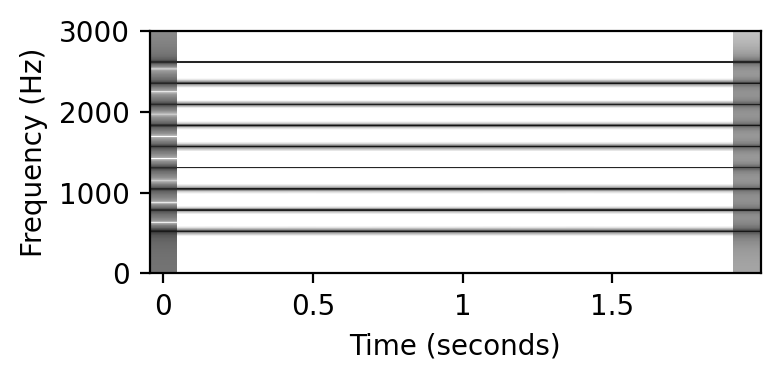

Pure tone (p = 72):


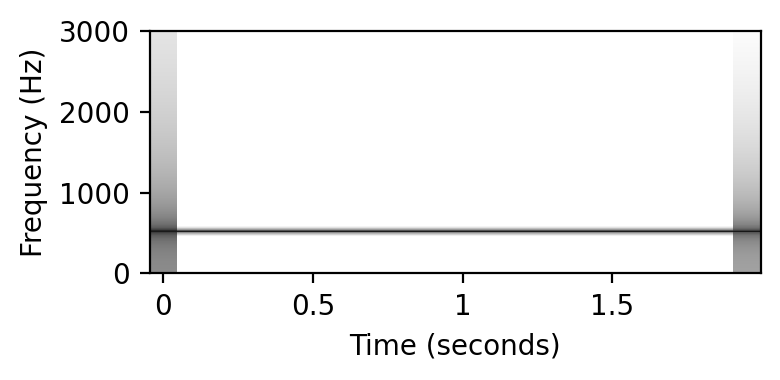

In [33]:
Fs = 11025
p = 60

print('Pure tone (p = %s):' % p)
x, t = generate_tone(Fs=Fs, p=p, weight_harmonic=[0.2])
plot_spectrogram(x)
ipd.display(ipd.Audio(data=x, rate=Fs))

print('Tone with harmonics (p = %s):' % p)
x, t = generate_tone(Fs=Fs, p=p, weight_harmonic=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plot_spectrogram(x)
ipd.display(ipd.Audio(data=x, rate=Fs))

print('Tone with harmonics and missing fundamental (p = %s):'  % p)
x, t = generate_tone(Fs=Fs, p=p, weight_harmonic=[0, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plot_spectrogram(x)
ipd.display(ipd.Audio(data=x, rate=Fs))

print('Pure tone (p = %s):' % (p + 12))
x, t = generate_tone(Fs=Fs, p=p, weight_harmonic=[0, 0.2])
plot_spectrogram(x)
ipd.display(ipd.Audio(data=x, rate=Fs))

출처: https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1.html, https://musicinformationretrieval.com/